<a href="https://colab.research.google.com/github/andreYoo/Time-series-analysis-anomaly-detection/blob/main/%ED%95%AD%EB%A1%9C%ED%91%9C%EC%A7%80%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B2%B0%EC%B8%A1%EC%B9%98%EB%B3%B4%EA%B0%84_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#실습용 데이터 패키지
from sklearn.datasets import load_boston


#데이터 전처리 패키지
import numpy as np
import pandas as pd

#기계 학습 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
plt.close('all')

plt.rc('font',family='Malgun Gothic')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


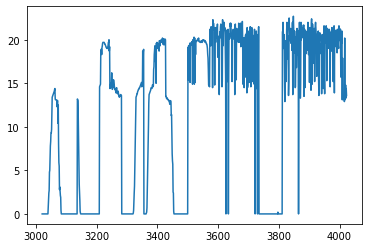

In [14]:
dataframe = pd.read_csv('./drive/MyDrive/study/tmp_TB_STATUS.csv')
raw_data = dataframe.values
dataframe.head()

# The last element contains the labels

# The other data points are the electrocadriogram data
data = dataframe['SOLAR_VOLT_STATUS'].dropna()
data = data[3000:4000].copy()
data.plot()
data = np.array(data)

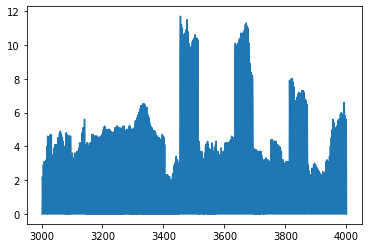

In [15]:
weather_dataframe = pd.read_csv('./drive/MyDrive/study/tmp_TB_WEATHER.csv')
raw_data = weather_dataframe.values
weather_dataframe.head()
# The last element contains the labels

# The other data points are the electrocadriogram data
wind_data = weather_dataframe['WIND_SPEED'].dropna()
wind_data = wind_data[3000:4000].copy()
wind_data.plot()
wind_data = np.array(wind_data)

In [16]:
X_train, X_test,y_train, y_test = train_test_split(data,wind_data,test_size=0.2, random_state=2021)

In [17]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train,axis=1)
model_trained = model.fit()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


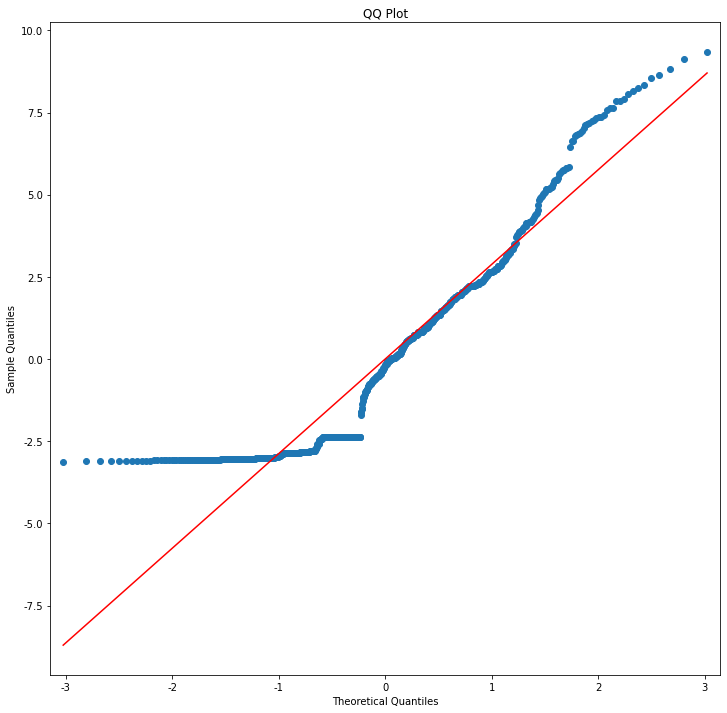

In [18]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line = 's', color = '#1f77b4', ax = ax)
ax.title.set_text('QQ Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted values')]

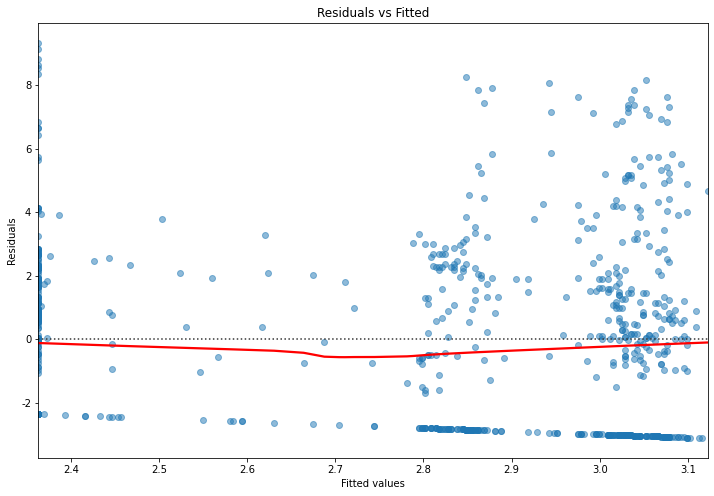

In [19]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data = X_train, lowess = True, scatter_kws = {'alpha' : 0.5},
             line_kws = {'color' : 'red'}, ax = ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel = 'Fitted values', ylabel = 'Residuals')

In [20]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.483
Date:                Wed, 16 Feb 2022   Prob (F-statistic):            0.00369
Time:                        07:57:27   Log-Likelihood:                -1980.8
No. Observations:                 800   AIC:                             3966.
Df Residuals:                     798   BIC:                             3975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3629      0.170     13.920      0.0

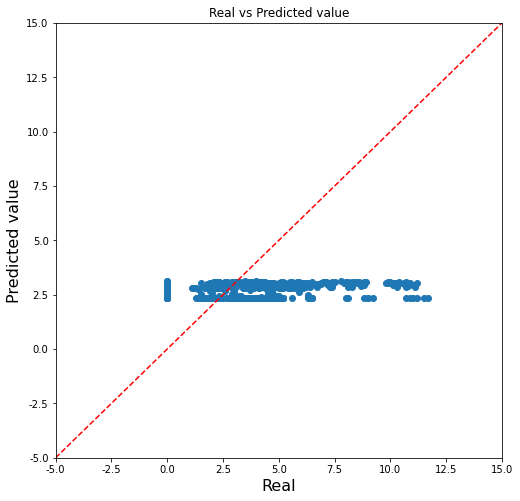

In [23]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (8,8))
plt.title('Real vs Predicted value')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 15], [-5, 15], ls = '--', c = 'red')
plt.xlabel('Real', size = 16)
plt.ylabel('Predicted value', size = 16)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.show()